<details>
<summary>
<i><b>"The Pricing of Options and Corporate Liabilities" By Fischer Black and Myron Scholes</b> </i>
<a href="https://www.cs.princeton.edu/courses/archive/fall09/cos323/papers/black_scholes73.pdf">
Useful Source</a>
</summary>
<img src="img/BSM1.png"/>
<p></p>
</details>

<div class="alert alert-block alert-success">
<b>Background:</b> "The Black-Scholes formula is probably one of the most widely used models in the realm of derivative pricing. Numerous variations and extensions of this formula are used to price many kinds of financial derivatives. However, the model is based on several assumptions. It assumes a specific form of movement for the derivative price, namely a <b>Geometric Brownian Motion (GBM)</b>. It also assumes a conditional payment at maturity of the option and economic constraints, such as no-arbitrage. Several other derivative pricing models have similarly impractical model assumptions. Finance practitioners are well aware that these assumptions are violated in practice, and prices from these models are further adjusted using practitioner judgment."</b>
</div>

<div class="alert alert-block alert-success">
<b>BSM Option Model: </b> The BSM model offers a closed form solution to price a European option on a stock which does not pay any dividends before its maturity date.<br>
The BSM set up assumes that option's underlying risk factor follows a geometric Brownian motion.<br>
Let's assume following numerical parameter values for the valuation:<br>
    
- Initial stock index level S0 = 50,

- Strike price of the European call option K = 55,

- Time to maturity T = 1/2 year = 6 months

- Constant, riskless short rate r = 0.05,

- Constant volatility σ = 0.2
    
In the BSM model, the index level at maturity is a random variable given by the following eqaution:1
</div>
 <img src="img/BSM2.png"/>
 
<div class="alert alert-block alert-success">
    
The variables and parameters have the following meaning:
    
- ST = Index level at date T

- r = Constant riskless short rate

- σ = Constant Volatility (equivalent to standard deviation of returns) of S

- z = Standard normally distributed random variable
    
One can use the following equation:2 for Monte-Carlo Estimator of the <b>european option</b> ,where ST (i) is the ith simulated value of the underlying at maturity T for a total number of simulated paths I with i = 1, 2, ..., I.
</div>

<img src="img/MCE1.png"/>

<div class="alert alert-block alert-warning">
Given the above settings, let's see how we can derive the value of the European Call options <b>--></b>

**Steps:**
- Draw I pseudo-random numbers z(i), where i belongs to {1,2,...,I} from the standard normal distribution
- Calculate all resulting index levels at maturity ST(i) for given z(i) and the above equation
- Calculate all inner values of the option at maturity as hT(i) = max(ST(i) – K, 0)
- Estimate the option present value via the Monte Carlo estimator as given in equation:2

In [79]:
# Import the relevant packages
import math
import numpy as np

In [80]:
# The model and simulation parameter values are defined
S0 = 50. # initial index level
K = 55. # strike price
T = 6/12 # 1.0 # time-to-maturity
r = 0.05 # riskless short rate
sigma = 0.2 # volatility
I = 100000 # number of simulations
# Valuation Algorithm
np.random.seed(2021) # The seed value for the random number generator is fixed.
z = np.random.standard_normal(I) # Standard normally distributed random numbers are drawn.

In [81]:
# index values at maturity
ST = S0*np.exp((r-sigma**2/2)*T+sigma*math.sqrt(T)*z) # End-of-period values are simulated.
ht = np.maximum(ST - K, 0) # The option payoffs at maturity are calculated.
C0 = math.exp(-r * T)*np.mean(ht) # The Monte Carlo estimator is evaluated.

In [82]:
# Print the final value
print('Value of the European call option: {:5.2f}.'.format(C0)) # Result Output

Value of the European call option:  1.45.


<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Alternative approach to calculate the call option value</span></b>
</div>

<div class="alert alert-block alert-success">
"The Black Scholes call option formula is calculated by multiplying the stock price by the cumulative standard normal probability distribution function. Thereafter, the net present value (NPV) of the strike price multiplied by the cumulative standard normal distribution is subtracted from the resulting value of the previous calculation."<br>
The closed-form formula for a european call(c) and put(p) are:
</div>

<div class="alert alert-block alert-success">
 
$$ d_1 = \frac{\ln(S_0/X) + (r + \sigma^2/2)T}{\sigma\sqrt{T}}, $$
and
$$ d_2 = d_1 - \sigma\sqrt{T}, $$
and
$$ c = S_0 * N(d_1) - X * e^{-r.T}N{(d_2)}, $$
and
$$ p = Xe^{-r.T}N{(-d_2)} - S_0 * N(-d_1)d_2, $$
    
</div>

__Black-Scholes-Merton option model on non-dividend paying stocks__ 

In [1]:
from scipy import log, exp, sqrt, stats
import numpy as np
# Create a custom function to calculate the value
def val_callop(S,K,T,r,sigma):
    # based on the above formulation
    d1 = (np.log(S/K)+(r+sigma*sigma/2.)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*stats.norm.cdf(d1) - K*np.exp(-r*T)*stats.norm.cdf(d2)

In [5]:
c = val_callop(50.,55,0.5,0.05,0.2)
print(round(c,2))

1.45


__Black-Scholes-Merton European option model with known dividends__ 

<div class="alert alert-block alert-success">
Let's assume that we have a known dividend d1 - distributed at say time T1 and T1 <T (matuirity date). <br>
The modified BSM formula will look like:<br>  
$$ S = S_0 - PV(d_1), $$
or
$$ S = S_0 - e^{-r.T_1}.d_1, $$
and
$$ d_1 = \frac{\ln(S/X) + (r + \sigma^2/2)T}{\sigma\sqrt{T}}, $$
and
$$ d_2 = \frac{\ln(S/X) + (r - \sigma^2/2)T}{\sigma\sqrt{T}} = d_1 - \sigma\sqrt{T}, $$
and
$$ c = S * N(d_1) - X * e^{-r.T}N{(d_2)}, $$
and
$$ p = X * e^{-r.T}N{(-d_2)} - S * N(-d_1), $$
    
</div>

<div class="alert alert-block alert-success">
We can modify the same example by introducing a known dividend component of $2.5 delivered in one month
</div>

In [6]:
# We can calculate the value of the call option with a known dividend as follows:
S0 = 50
d1 = 2.5 # --> known dividend
r = 0.05
T = 6/12
S = S0-np.exp(-r*T*d1) #New adjustment factor for the known dividend --> S = S0 - PV(d1)
K = 55
sigma = 0.2

In [7]:
# The redefined S value based on the known dividend factor
print(S)

49.06058693718652


In [8]:
# Just pass on the above calculated params within function call
cd = val_callop(S,K,T,r,sigma)
print(round(cd,2))

1.16


<span style="color:blue"><b>Case Study:Derivative Pricing - Application of Supervised Machine Learning Models to learn Black-Scholes option pricing model from simulated data</b></span>

<div class="alert alert-block alert-success">
Options is being used in finance as means to hedge risk in a nonlinear fashion. 
Historically, people have used the Black Scholes formula:

<div class="alert alert-block alert-success">
$$  Se^{-q \tau}\Phi(d_1) - e^{-r \tau} K\Phi(d_2) \, $$
with
$$  d_1 = \frac{\ln(S/K) + (r - q + \sigma^2/2)\tau}{\sigma\sqrt{\tau}}  $$
and
$$  d_2 = \frac{\ln(S/K) + (r - q - \sigma^2/2)\tau}{\sigma\sqrt{\tau}} = d_1 - \sigma\sqrt{\tau}  $$

Where we have;
    Stock price $S$;
    Strike price $K$;
    Risk-free rate $r$;
    Annual dividend yield $q$;
    Time to maturity $\tau = T-t$ (represented as a unit-less fraction of one year);
    Volatility $\sigma$
    
We also define, Moneyness as  𝑀=𝐾/𝑆 and look at the prices in terms of per unit of current stock price. We also set 𝑞=0

<b>Volatility Surface :</b> In the options market, there isn't a single value of volatility which gives us the correct price. We often find the volatility such that the output matches the price.
    
We can make use of the following function to generate the option volatility surface:
$$ \sigma(M, \tau) = \sigma_0 + \alpha\tau + \beta (M - 1)^2$$

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Loading all the required packages</span></b>
</div>

In [ ]:
# !pip install pandas_datareader

In [33]:
# Distribution functions
from scipy.stats import norm

# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [34]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Define required function and parameters</span></b>
</div>

In [35]:
# Base params:
t_alpha = 0.1
t_beta = 0.1
t_sigma0 = 0.2
r = 0.05

__Volatility and option price functions__

In [36]:
def option_vol(moneyness, T):
    return t_sigma0 + t_alpha * T + t_beta * np.square(moneyness - 1)

def call_option_price(moneyness, T, option_volatility):
    d1=(np.log(1/moneyness)+(r+np.square(option_volatility))*T)/(option_volatility*np.sqrt(T))
    d2=(np.log(1/moneyness)+(r-np.square(option_volatility))*T)/(option_volatility*np.sqrt(T))
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    
    return N_d1 - moneyness * np.exp(-r*T) * N_d2

__Synthetic Data generation__

In [37]:
N = 10000

Ks = 1+0.25*np.random.randn(N)
Ts = np.random.random(N)
Sigmas = np.array([option_vol(k,t) for k,t in zip(Ks,Ts)])
Ps = np.array([call_option_price(k,t,sig) for k,t,sig in zip(Ks,Ts,Sigmas)])

In [38]:
# Y = Ps

# X = np.concatenate([Ks.reshape(-1,1), Ts.reshape(-1,1), Sigmas.reshape(-1,1)], axis=1)

# dataset = pd.DataFrame(np.concatenate([Y.reshape(-1,1), X], axis=1),
#                        columns=['Price', 'Moneyness', 'Time', 'Volatility'])

In [39]:
dataset.head()

,Price,Moneyness,Time,Volatility
0,0.204,0.932,0.617,0.262
1,0.005,1.298,0.238,0.233
2,0.007,1.117,0.084,0.210
3,0.151,1.050,0.596,0.260
4,0.125,1.026,0.431,0.243


In [40]:
dataset.shape

(10000, 4)

In [41]:
print(Y.shape)
print(X.shape)

(10000,)
(10000, 3)


In [42]:
# Check for missing values
dataset.isnull().sum()

Price         1
Moneyness     0
Time          0
Volatility    0
dtype: int64

In [43]:
# remove the missing observations
dataset.dropna(inplace=True)

In [44]:
dataset.isnull().sum()

Price         0
Moneyness     0
Time          0
Volatility    0
dtype: int64

In [45]:
dataset.shape

(9999, 4)

__Define the Dependant and Independent features and create the combined Data__

In [46]:
# # Recreate the X and Y vars from the revised dataset
# Y = dataset['Price']
# X =dataset[['Moneyness','Time','Volatility']]
Y = Ps

X = np.concatenate([Ks.reshape(-1,1), Ts.reshape(-1,1), Sigmas.reshape(-1,1)], axis=1)

dataset = pd.DataFrame(np.concatenate([Y.reshape(-1,1), X], axis=1),
                       columns=['Price', 'Moneyness', 'Time', 'Volatility'])

**Basic EDA**

In [47]:
# Summary Stats
# pd.set_option('precision', 2)
# dataset.describe()

pd.set_option('precision', 3)
dataset.describe()

,Price,Moneyness,Time,Volatility
count,10000.000,10000.000,1.000e+04,10000.000
mean,0.179,1.000,5.062e-01,0.257
std,0.136,0.251,2.903e-01,0.030
min,0.000,0.101,2.695e-06,0.200
25%,0.076,0.830,2.542e-01,0.231
50%,0.159,1.001,5.125e-01,0.258
75%,0.255,1.166,7.579e-01,0.282
max,0.899,1.975,9.999e-01,0.382


__Basic Data Exploration - Visualization__

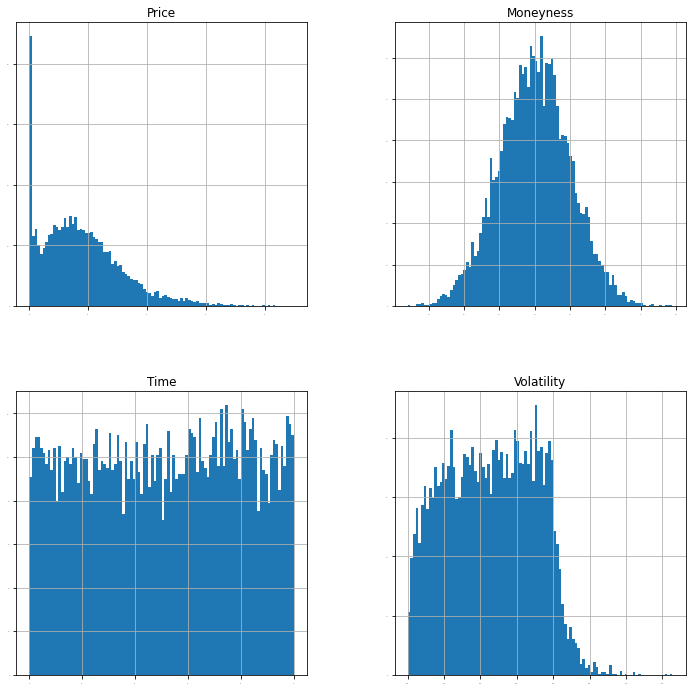

In [48]:
dataset.hist(bins=100, 
             sharex=False, 
             sharey=False, 
             xlabelsize=1, 
             ylabelsize=1, 
             figsize=(12,12))
pyplot.show()

We can see that the price has an interesting distribution with a spike at  0

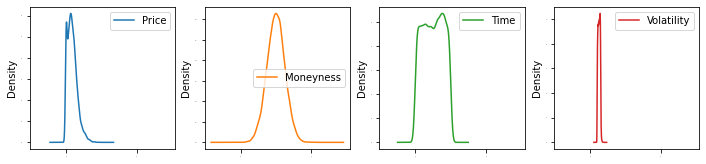

In [49]:
dataset.plot(kind='density', 
             subplots=True, 
             layout=(4,4), 
             sharex=True, 
             legend=True, 
             fontsize=1, 
             figsize=(12,12))
pyplot.show()

__Correlation Plot__

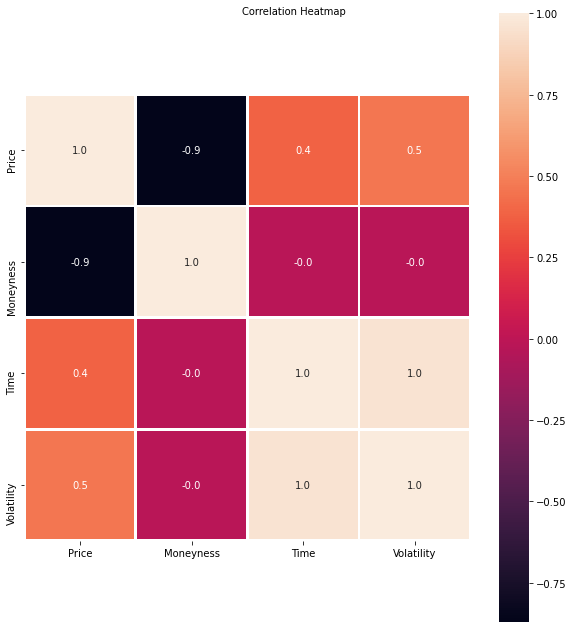

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(10, 10))
corr = dataset.corr(method='pearson')
hmap = sns.heatmap(round(corr,2), square=True,annot=True, ax=ax,fmt='0.0001f',linewidths=2)
f.subplots_adjust(top=0.97)
t_o= f.suptitle('Correlation Heatmap', fontsize=10)

<Figure size 864x864 with 0 Axes>

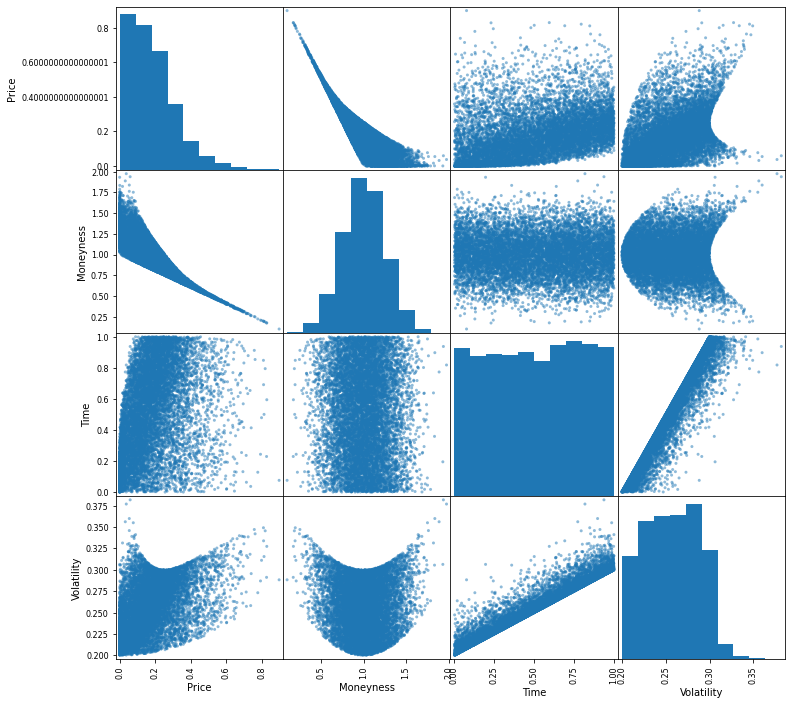

In [51]:
pyplot.figure(figsize=(12,12))
scatter_matrix(dataset,figsize=(12,12))
pyplot.show()

We do observe some very interesting non linear trends. As per our expectation some non linear models will do a better job!

__Univariate Feature selection__

In [52]:
len(X)

10000

In [53]:
bestfeatures = SelectKBest(k='all', score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(['Moneyness', 'Time', 'Vol'])
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
featureScores.nlargest(3,'Score').set_index('Features')  #print top 3 - best features

,Score
Features,
Moneyness,30254.996
Vol,2610.242
Time,1701.903


In [54]:
# !pip install pycaret

In [55]:
from pycaret.regression import *
exp_reg = setup(dataset, target='Price')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,5455
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(10000, 4)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [56]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,0.0004,0.0000,0.0008,1.0000,0.0006,1213768806781378835884131633312530538003549505910303271501307477497016062107810000260561940320658967528752848777653218537685856492128844128872595266675346788052405456091393926302927258439787187886218767664264918251601920.0000,0.2246
1,Random Forest,0.0010,0.0000,0.0016,0.9998,0.0013,41804207492543539349611695789199983812448093282173270088274688774899623905427998346361471404992047937151864771477700743338205339497289794423573079110294988630443092903823700009245109052049143316323762176.0000,0.3368
2,Extreme Gradient Boosting,0.0021,0.0000,0.0029,0.9995,0.0024,229683256015765424046923305835501222370095892772339026718090706243958137220048842169799286889680300881027304382833620001762940298943269381598727251512921979864972712169504801634737538483101397962772011303722591968068337682874368.0000,0.3152
3,Decision Tree,0.0024,0.0000,0.0033,0.9994,0.0028,33411052244169526796579699489247539639548112096589938932951052314166165504.0000,0.0206
4,CatBoost Regressor,0.0015,0.0000,0.0036,0.9992,0.0024,138554092771549373351045899923687510762744745007209025892642666539100274473978388196168250511256707364746426186947778520014478398685953981607195202353275754874759738321543659639792850387913731160488431482642353690880468443987968.0000,2.4222
5,Light Gradient Boosting Machine,0.0021,0.0000,0.0039,0.9991,0.0028,23605588816459750456314618748796174517301189681039426432653329848088864226911476359558523023265267458378444750618415937521952362524742542478721289053050129000585606547564668613930318367571756386095347765316453611972158931599360.0000,0.0819
6,K Neighbors Regressor,0.0019,0.0000,0.0043,0.9989,0.0029,19168164552969202883017375471012469808197887014352477342964435288098988497644032486591960870201820363475103517212672781856845908029045008549601773073969411179478014109670780484424596583052714269844752456723652935680.0000,0.0038
7,Gradient Boosting Regressor,0.0035,0.0000,0.0045,0.9989,0.0038,187015834723423963277164017003955175686706734679545780144339954067476652909884393145969814019968278503375411656756319671969640325003329571207499544459820831507629067496670928196182338949459925669548624257844470496486578276270080.0000,0.5356
8,Linear Regression,0.0140,0.0004,0.0188,0.9805,0.0153,30810335600905535037020184200957884222541313335341479387415282997238083134743015075427618378254928140973785892673854577467849870778345545137090735981394723695254389714937159781213030674753739568189468870506160724814634709663350784.0000,0.0024
9,Least Angle Regression,0.0140,0.0004,0.0188,0.9805,0.0153,30810335600905610446328468798440484029372274304866028717086696270258532902098041468771782381205593962497249968181891367495691392949274678983671474616406905495606941780301024739299579972135499243881101900156635526074691593825157120.0000,0.0031


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5455, verbose=0, warm_start=False)

In [57]:
# train a decision tree model
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0010,0.0000,0.0015,0.9999,0.0013,3311006525323390590920749185455717483903971480216683071339040065716217469502226432.0000
1,0.0010,0.0000,0.0019,0.9998,0.0013,418042074925435428304776455131648417845333637444316661554961451107760357853051024565262413090733059525272396168843473029713150605623588485989154263510771528246732257485305697083377255988821435626572218368.0000
2,0.0010,0.0000,0.0014,0.9999,0.0011,27831868853912825627790832989741706428842410594271232.0000
3,0.0010,0.0000,0.0015,0.9999,0.0012,23212620488954299884199794354165774074581991185879962422533421946301036310053465656131584.0000
4,0.0009,0.0000,0.0015,0.9999,0.0012,983934633268215181916737112549153274234605046259785740058624000.0000
5,0.0011,0.0000,0.0024,0.9997,0.0016,78990378912598487519269318850676786332333777505192930657645216994264759225018567725482348904448.0000
6,0.0009,0.0000,0.0014,0.9999,0.0012,41635193159526879480632147557105413441807880915905225290372905251024328652456447587647488.0000
7,0.0010,0.0000,0.0015,0.9999,0.0013,6474129.4774
8,0.0010,0.0000,0.0016,0.9999,0.0012,77986240966362099141863552079805336394252943360.0000
9,0.0010,0.0000,0.0015,0.9999,0.0012,28369767145786700977985990376044252439454652347864304300410215775801095799191896064.0000


In [58]:
# tune hyperparameters with custom_grid
params = {"n_estimators" :[10,50,200,500],
          "max_depth": [5,10,20,50],
          "min_samples_split": [2,3,4,5,6],
          "min_samples_leaf" : [1,2,3],
          "max_features":['auto', None, 'log2','sqrt']
          }
tuned_rf_custom = tune_model(rf, custom_grid = params,optimize = 'RMSE' )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0015,0.0000,0.0023,0.9997,0.0019,37909128979638869092776190236676613216694679581481335559142319373008068857497075981366591488.0000
1,0.0015,0.0000,0.0032,0.9995,0.0021,105719361903857865938442253440242571649158507801234693573105222336959168761471341506373808991862776898754382380075562500777762759585117691678986968289047093484729638498420393617728428370649535570890160072918228731212572131328000.0000
2,0.0015,0.0000,0.0021,0.9997,0.0017,3877204600567857068321990009275118321770059748816536550778080104762444873728.0000
3,0.0015,0.0000,0.0021,0.9998,0.0018,21656763898920581502599190145221600757805309199375014873911166099719848830517498390197770030873051136.0000
4,0.0015,0.0000,0.0021,0.9998,0.0018,59325136104121275510445238818128697225184177386774151924241399808.0000
5,0.0018,0.0000,0.0036,0.9993,0.0025,1867061694612676259457725985380820782822037732681163631778322580718591276541194749541223596811821776896.0000
6,0.0014,0.0000,0.0021,0.9998,0.0017,781650608950927442957501160414291661030137823467330356324692269267219124751170907797175046616721418798176927744.0000
7,0.0015,0.0000,0.0022,0.9997,0.0019,65019815906.2341
8,0.0016,0.0000,0.0023,0.9997,0.0018,12489561940914792206060368755826894030822082104461576068136960.0000
9,0.0016,0.0000,0.0023,0.9997,0.0019,2708150457645298862570751327401214153236006508544685058729586202583956602073242402816.0000


In [59]:
# Final Version of the Model
tuned_rf_custom

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=5455, verbose=0, warm_start=False)

__Create Train-Test Dataset__

In [60]:
X_train,X_test,Y_train,Y_test = train_test_split(dataset.drop(['Price'],axis=1),
                                                 dataset['Price'],
                                                 train_size = 0.8,
                                                 random_state=2021)

In [61]:
print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


__Choose the model - based on the performance__

In [62]:
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error. 
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error' 

In [63]:
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('MLP', MLPRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [64]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds, random_state=seed)
    #converted mean square error to positive. The lower the better
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

KNN: 0.000018 (0.000012) 0.000011 0.000013
SVR: 0.005234 (0.000137) 0.005167 0.005226
MLP: 0.000037 (0.000032) 0.000011 0.000009
ABR: 0.000644 (0.000042) 0.000610 0.000592
GBR: 0.000022 (0.000004) 0.000016 0.000021
RFR: 0.000003 (0.000003) 0.000000 0.000002
ETR: 0.000001 (0.000002) 0.000000 0.000001


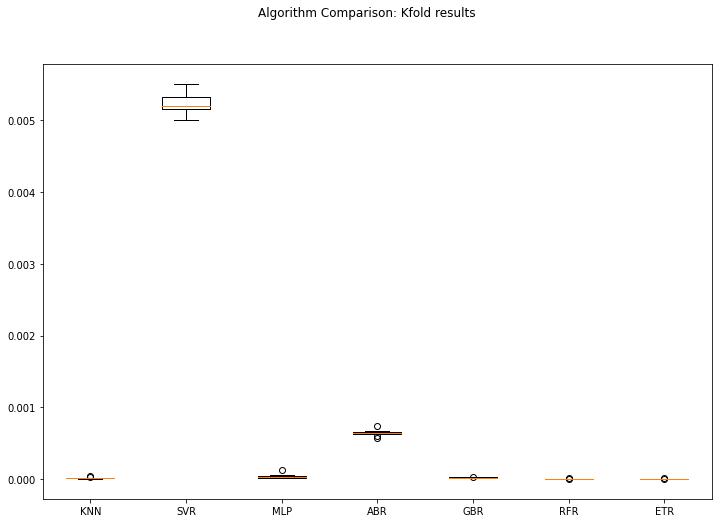

In [65]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(12,8)
pyplot.show()

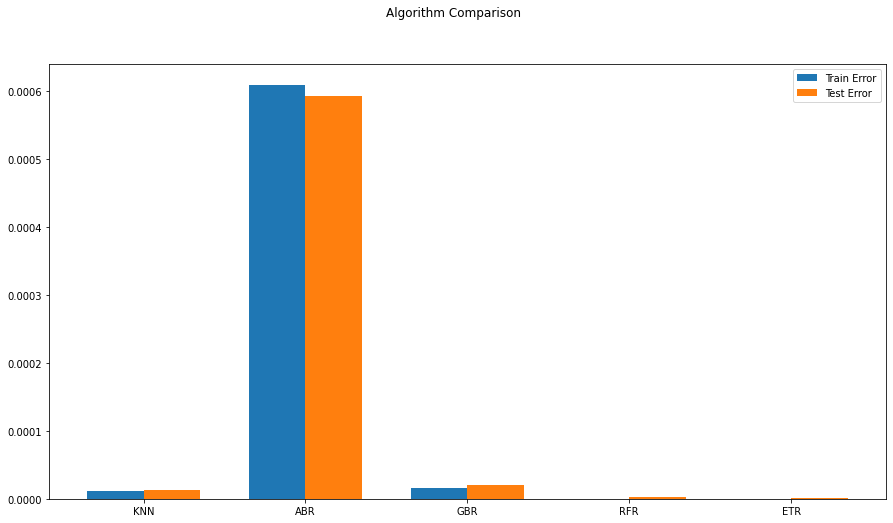

In [66]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names)-2)  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results[0:1] + train_results[3:],  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results[0:1] + test_results[3:], width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names[0:1] + names[3:])
pyplot.show()

__Hyper-parameter Tuning and choosing the final Model version - MLPRegressor__

In [67]:
# Grid Search for dealing with Overfitting Problem
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pipeline = Pipeline([
        ('reg_mlp', MLPRegressor())
    ])
parameters = {
    'reg_mlp__hidden_layer_sizes' :[(20,), (50,), (20,20,50), (20, 30, 20)],
    'reg_mlp__activation' :['tanh', 'relu'],
    'reg_mlp__solver':['sgd', 'adam'],
    'reg_mlp__learning_rate': ['constant','adaptive']
}

In [68]:
%time
rand_search = RandomizedSearchCV(pipeline,
                                 parameters,
                                 cv=5,
                                 verbose=1,
                                 n_jobs = -1,
                                 scoring='neg_mean_squared_error')
# rand_search.fit(x_train,y_train)
rand_search.fit(X_train,Y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.06 µs
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('reg_mlp',
                                              MLPRegressor(activation='relu',
                                                           alpha=0.0001,
                                                           batch_size='auto',
                                                           beta_1=0.9,
                                                           beta_2=0.999,
                                                           early_stopping=False,
                                                           epsilon=1e-08,
                                                           hidden_layer_sizes=(100,),
                                                           learning_rate='constant',
                                                           learning_rate_init=0.001,
                                                           max_fun

In [69]:
print(rand_search.best_params_)

{'reg_mlp__solver': 'adam', 'reg_mlp__learning_rate': 'adaptive', 'reg_mlp__hidden_layer_sizes': (50,), 'reg_mlp__activation': 'relu'}


__Final Model__

In [70]:
# prepare model
model_tuned_mlp = MLPRegressor(activation='relu',
                               hidden_layer_sizes=(20, 30, 20),
                               solver = 'adam',
                               learning_rate ='adaptive'
                              )
model_tuned_mlp.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(20, 30, 20), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [71]:
Y_test_df= pd.DataFrame(Y_test)

In [72]:
Y_test_df.rename(columns = {0:'Price'}, inplace = True)

In [73]:
Y_test_df.head()

,Price
1955,0.203
8233,0.459
156,0.085
8623,0.226
6962,0.067


In [74]:
X_test_df = pd.DataFrame(X_test)

In [75]:
X_test_df['predictions'] = model_tuned_mlp.predict(X_test)

In [76]:
X_test_df.head()

,Moneyness,Time,Volatility,predictions
1955,0.898,0.536,0.255,0.203
8233,0.562,0.673,0.286,0.461
156,1.243,0.615,0.267,0.083
8623,1.020,0.900,0.290,0.230
6962,1.252,0.550,0.261,0.066


In [77]:
Y_test_df['predictions']= X_test_df['predictions'].copy()
Y_test_df.head()

,Price,predictions
1955,0.203,0.203
8233,0.459,0.461
156,0.085,0.083
8623,0.226,0.230
6962,0.067,0.066


In [78]:
print(mean_squared_error(Y_test_df['Price'], Y_test_df['predictions']))

1.7851010897409452e-05


Artificial neural network (ANN) can approximate the BSM call option pricing formula for a call option to a high degree of precision which means that it can be effectively leveraged for the efficient numerical calculation of  derivative pricing without relying on the impractical assumptions made in the traditional derivative pricing models.